# Plots for Colorado Consumption

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\caspe\AppData\Local\Temp\ipykernel_33572\2672421247.py:13: FutureWarning: Parsed string "8/1/2022 12 a.m. MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Timestamp (Hour Ending)'] = pd.to_datetime(df['Timestamp (Hour Ending)'])
C:\Users\caspe\AppData\Local\Temp\ipykernel_33572\2672421247.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp (Hour Ending)'] = pd.to_datetime(df['Timestamp (Hour Ending)'])
C:\Users\caspe\AppData\Local\Temp\ipykernel_33572\2672421247.py:13: FutureWarning: Parsed string "8/1/2022 1 a.m. MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will

Minimum value in 'Demand (MWh)': 0
Maximum value in 'Demand (MWh)': 8439


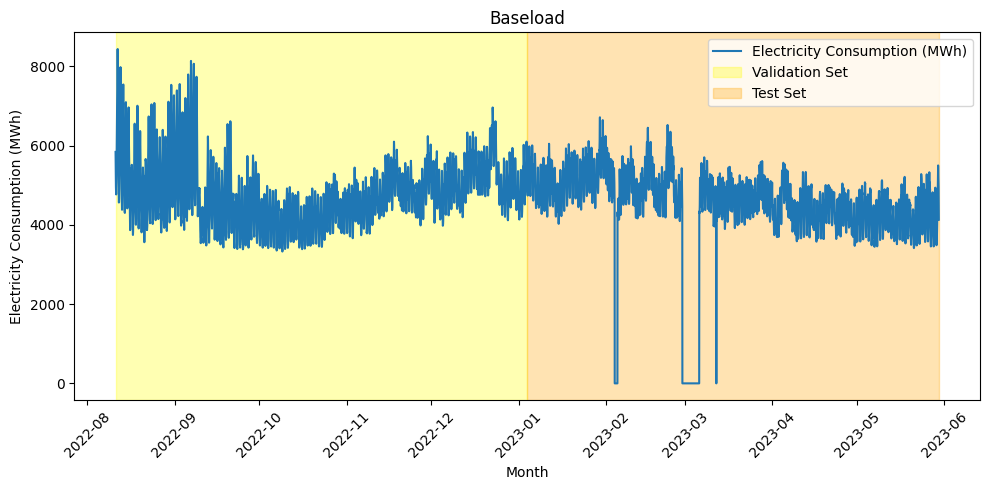

In [3]:
files = ['Aug2022.csv', 'Sep2022.csv', 'Oct2022.csv', 'Nov2022.csv', 'Dec2022.csv',
         'Jan2023.csv', 'Feb2023.csv', 'Marts2023.csv', 'April2023.csv', 'May2023.csv']


# Columns to keep
columns_to_keep = ["Timestamp (Hour Ending)", "Demand (MWh)"]

# Read and concatenate all files
df = pd.concat([pd.read_csv(f, usecols=lambda c: c in columns_to_keep)
               for f in files], ignore_index=True)


df['Timestamp (Hour Ending)'] = pd.to_datetime(df['Timestamp (Hour Ending)'])

df.drop_duplicates(subset='Timestamp (Hour Ending)', inplace=True)

# Create a complete range of timestamps based on the min and max timestamps in the dataset
full_range = pd.date_range(start=df['Timestamp (Hour Ending)'].min(),
                           end=df['Timestamp (Hour Ending)'].max(),
                           freq='H')  # Hourly frequency

# Reindex the DataFrame to include the full range of timestamps
df = df.set_index('Timestamp (Hour Ending)').reindex(full_range).reset_index()

# Rename the index column back to 'Timestamp (Hour Ending)'
df.rename(columns={'index': 'Timestamp (Hour Ending)'}, inplace=True)

df.to_csv('ColoradoDemand_Full.csv', index=False)

# filter from start to end date
# start_date = pd.Timestamp('2022-08-11 00:00:00')
# end_date = pd.Timestamp('2023-05-22 23:00:00')
start_date = pd.Timestamp('2022-08-11 00:00')
end_date = pd.Timestamp('2023-05-30 00:00')
df = df[(df['Timestamp (Hour Ending)'] >= start_date) &
        (df['Timestamp (Hour Ending)'] <= end_date)]


val_start_date = pd.Timestamp('2022-08-11 00:00')
val_end_date = pd.Timestamp('2023-01-03 23:00')
test_start_date = pd.Timestamp('2023-01-04 00:00')
test_end_date = pd.Timestamp('2023-05-30 00:00')

# range1_start = pd.Timestamp('2022-08-11 00:00')
# range1_end = pd.Timestamp('2023-01-03 23:00')


# Train dates: 2021-05-30 00:00:00 to 2022-08-10 23:00:00
# Validation dates: 2022-08-11 00:00:00 to 2023-01-03 23:00:00
# Test dates: 2023-01-04 00:00:00 to 2023-05-30 00:00:00



df['Demand (MWh)'] = df['Demand (MWh)'].fillna(0).astype(int)

range1_start = pd.Timestamp('2022-08-11 00:00')
range1_end = pd.Timestamp('2023-01-03 23:00')


# Get the minimum value of the column 'Demand (MWh)'
min_value = df['Demand (MWh)'].min()
print("Minimum value in 'Demand (MWh)':", min_value)


max_value = df['Demand (MWh)'].max()
print("Maximum value in 'Demand (MWh)':", max_value)


# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp (Hour Ending)"], df["Demand (MWh)"],
         label='Electricity Consumption (MWh)')
plt.axvspan(val_start_date, val_end_date, color='yellow', alpha=0.3, label='Validation Set')
plt.axvspan(test_start_date, test_end_date, color='orange', alpha=0.3, label='Test Set')
plt.title('Baseload')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (MWh)')
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('ColoradoDemand_Full.png')

# Show the plot
plt.show()

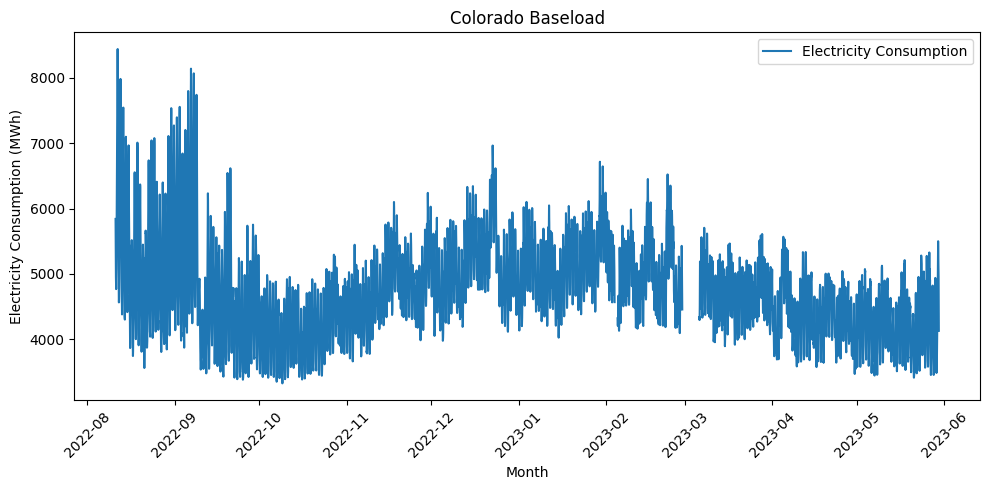

In [7]:
# Replace zero values with NaN to break the line in the plot
import numpy as np


df["Demand (MWh)"] = df["Demand (MWh)"].replace(0, np.nan)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp (Hour Ending)"], df["Demand (MWh)"],
         label='Electricity Consumption')
# plt.axvspan(val_start_date, val_end_date, color='yellow',
#             alpha=0.3, label='Validation Set')
# plt.axvspan(test_start_date, test_end_date,
#             color='orange', alpha=0.3, label='Test Set')
plt.title('Colorado Baseload')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (MWh)')
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('ColoradoBaseload.png')

# Show the plot
plt.show()